In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
data = pd.read_csv('Rainfall_and_Streamflow_Dataset.csv')

In [7]:
features = ['precipitation_mm', 'lag1_precip', 'day', 'month']
target = 'streamflow_cms'

X = data[features]
y = data[target]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Model linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [10]:
# Decision tree regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

In [11]:
# gradient boosting regression
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient = gradient_boosting_model.predict(X_test)

In [12]:
# Evaluate models
models = {
    'Linear Regression': y_pred_linear,
    'Decision Tree': y_pred_tree,
    'Gradient Boosting': y_pred_gradient
}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

Linear Regression - MSE: 0.04366365265759428, R2: 0.2585417473238706
Decision Tree - MSE: 0.07666666666666667, R2: -0.30188679245283057
Gradient Boosting - MSE: 0.029143165517419283, R2: 0.5051160572513707


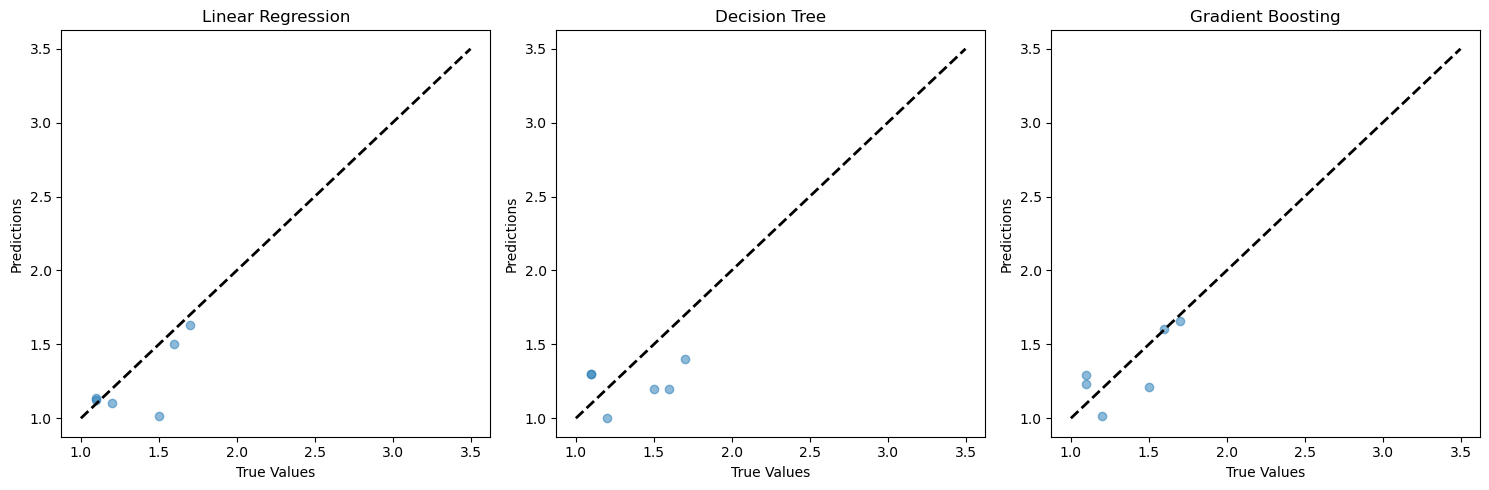

In [17]:
# Plotting predictions
plt.figure(figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(model_name)
plt.tight_layout()
plt.show()


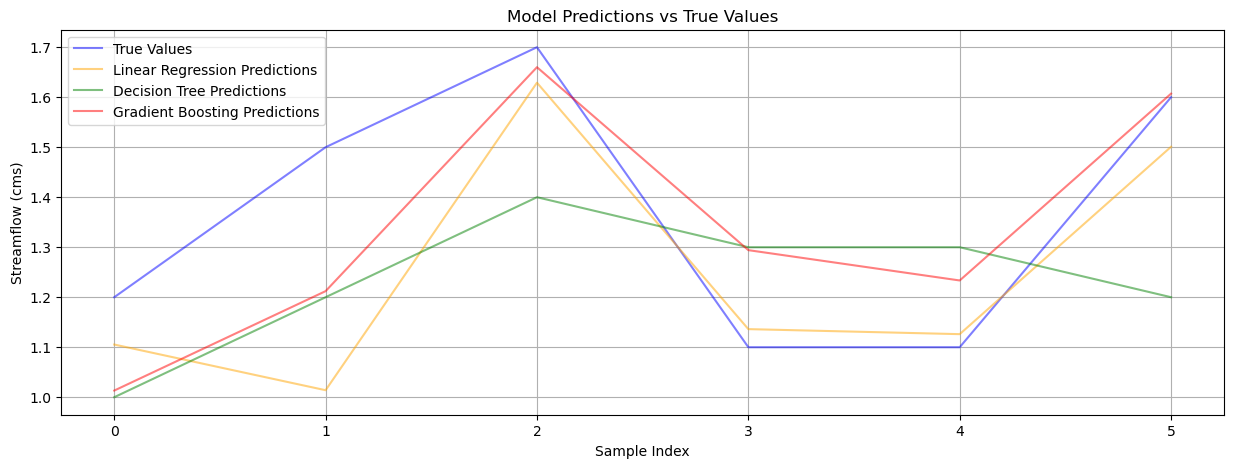

In [19]:
# Plotting predictions
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='True Values', color='blue', alpha=0.5)
plt.plot(y_pred_linear, label='Linear Regression Predictions', color='orange', alpha=0.5)
plt.plot(y_pred_tree, label='Decision Tree Predictions', color='green', alpha=0.5)
plt.plot(y_pred_gradient, label='Gradient Boosting Predictions', color='red', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Streamflow (cms)')
plt.title('Model Predictions vs True Values')
plt.grid(True)
plt.legend()
plt.show()
#plt.savefig('model_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.close()
